In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
import scipy.stats as stats
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

data analysis and machine learning of categories chlorides, free sulfur dioxide, total sulfur dioxide, and sulphates, with quality

In [2]:
df = pd.read_csv('WineQT.csv')
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \

In [3]:
data = pd.DataFrame(df[['chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'quality']])

In [4]:
data['quality'].describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   chlorides             1143 non-null   float64
 1   free sulfur dioxide   1143 non-null   float64
 2   total sulfur dioxide  1143 non-null   float64
 3   sulphates             1143 non-null   float64
 4   quality               1143 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 44.8 KB


In [5]:
#chlorides: some of the values in chlorides are very long decimals (0.07200000000000001) g/L (salt concentration)
#should round to three decimal places to keep consistent with the rest of the columns

data['chlorides'] = data['chlorides'].apply(lambda x: round(x, 3))

In [6]:
data.describe()

,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,0.086933,15.615486,45.914698,0.657708,5.657043
std,0.047267,10.250486,32.782130,0.170399,0.805824
min,0.012000,1.000000,6.000000,0.330000,3.000000
25%,0.070000,7.000000,21.000000,0.550000,5.000000
50%,0.079000,13.000000,37.000000,0.620000,6.000000
75%,0.090000,21.000000,61.000000,0.730000,6.000000
max,0.611000,68.000000,289.000000,2.000000,8.000000


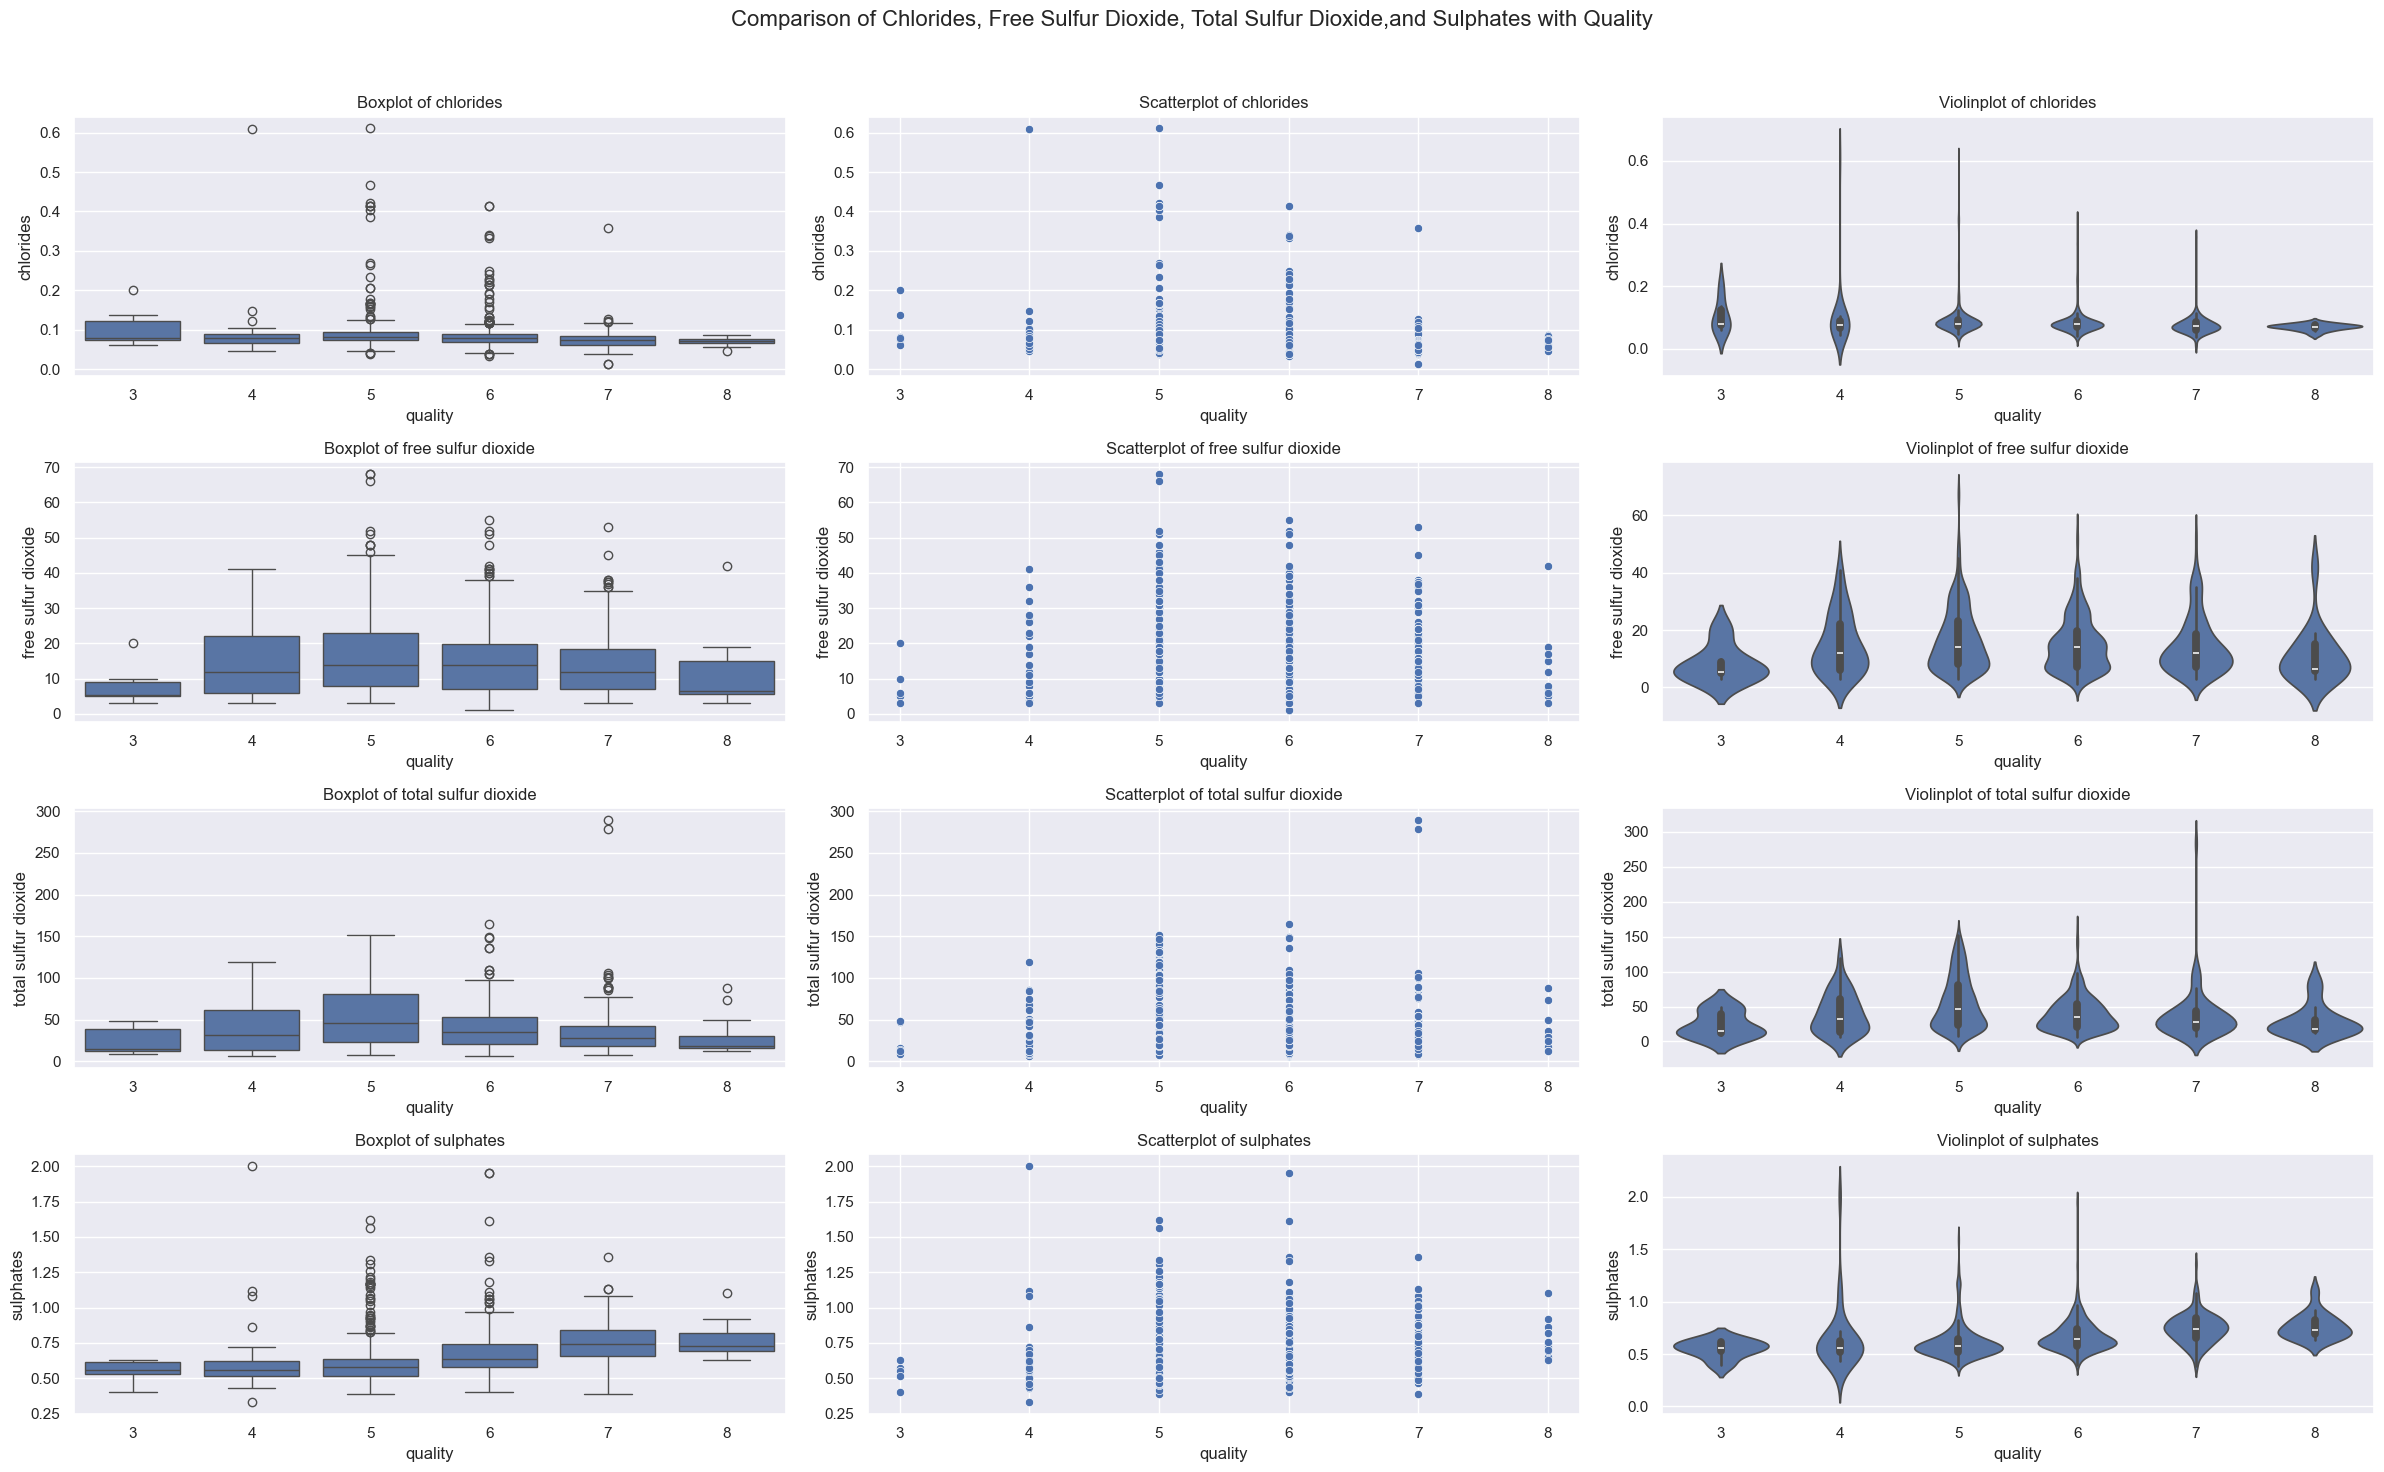

In [7]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(4, 3, figsize=(24, 15))
f.suptitle('Comparison of Chlorides, Free Sulfur Dioxide, Total Sulfur Dioxide,and Sulphates with Quality', fontsize=16)

features = ['chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates']
plot_types = ['boxplot', 'scatterplot', 'violin plot']

for i, feature in enumerate(features):
    #boxplot
    sb.boxplot(x='quality', y=feature, data=df, ax=axes[i,0])
    axes[i,0].set_title(f'Boxplot of {feature}')
    
    #scatterplot
    sb.scatterplot(x='quality', y=feature, data=df, ax=axes[i, 1])
    axes[i, 1].set_title(f'Scatterplot of {feature}')
    
    #violinplot
    sb.violinplot(x='quality', y=feature, data=df, ax=axes[i, 2])
    axes[i, 2].set_title(f'Violinplot of {feature}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [8]:
data.corr()

,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,quality
chlorides,1.000000,0.015280,0.048163,0.374784,-0.124085
free sulfur dioxide,0.015280,1.000000,0.661093,0.034445,-0.063260
total sulfur dioxide,0.048163,0.661093,1.000000,0.026894,-0.183339
sulphates,0.374784,0.034445,0.026894,1.000000,0.257710
quality,-0.124085,-0.063260,-0.183339,0.257710,1.000000


In [9]:
chloride_data = pd.DataFrame()

#log
chloride_data['chlorides_log'] = np.log1p(data['chlorides'])

print("Correlation with Original Chlorides:", data['chlorides'].corr(data['quality']))
print("Correlation with Log-Transformed Chlorides:", chloride_data['chlorides_log'].corr(data['quality']))

robust_scaler = RobustScaler()
data['chlorides'] = robust_scaler.fit_transform(chloride_data[['chlorides_log']])

Correlation with Original Chlorides: -0.12408453132892873
Correlation with Log-Transformed Chlorides: -0.13013596252086532


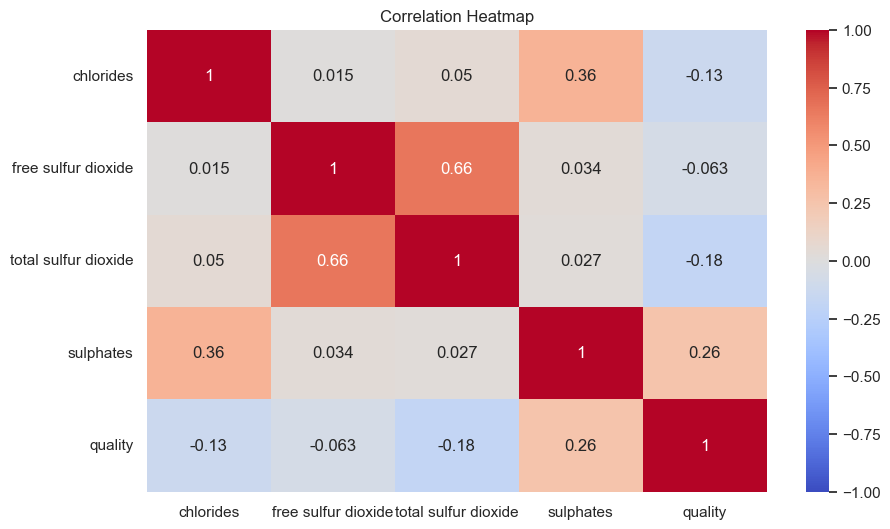

In [10]:
correlation_matrix = data.corr()
f, axes = plt.subplots(1,1, figsize=(10,6))
sb.heatmap(correlation_matrix, annot = True, cmap='coolwarm', vmin=-1,vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [11]:
predictors = ['chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates']

y = pd.DataFrame(data['quality'].astype('category'))
x = pd.DataFrame(data[predictors]) 

[Text(0.5, 0.9, 'sulphates <= 0.585\ngini = 0.635\nsamples = 914\nvalue = [6, 25, 391, 373, 109, 10]\nclass = 5'),
 Text(0.25, 0.7, 'chlorides <= -0.579\ngini = 0.525\nsamples = 343\nvalue = [4.0, 15.0, 216.0, 94.0, 14.0, 0.0]\nclass = 5'),
 Text(0.125, 0.5, 'free sulfur dioxide <= 31.5\ngini = 0.686\nsamples = 61\nvalue = [1, 5, 24, 22, 9, 0]\nclass = 5'),
 Text(0.0625, 0.3, 'total sulfur dioxide <= 27.5\ngini = 0.65\nsamples = 55\nvalue = [1, 5, 24, 21, 4, 0]\nclass = 5'),
 Text(0.03125, 0.1, 'gini = 0.61\nsamples = 33\nvalue = [0, 2, 18, 9, 4, 0]\nclass = 5'),
 Text(0.09375, 0.1, 'gini = 0.607\nsamples = 22\nvalue = [1, 3, 6, 12, 0, 0]\nclass = 6'),
 Text(0.1875, 0.3, 'chlorides <= -0.985\ngini = 0.278\nsamples = 6\nvalue = [0, 0, 0, 1, 5, 0]\nclass = 7'),
 Text(0.15625, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 0, 0, 5, 0]\nclass = 7'),
 Text(0.21875, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0, 0]\nclass = 6'),
 Text(0.375, 0.5, 'total sulfur dioxide <= 9.5\ngini = 0

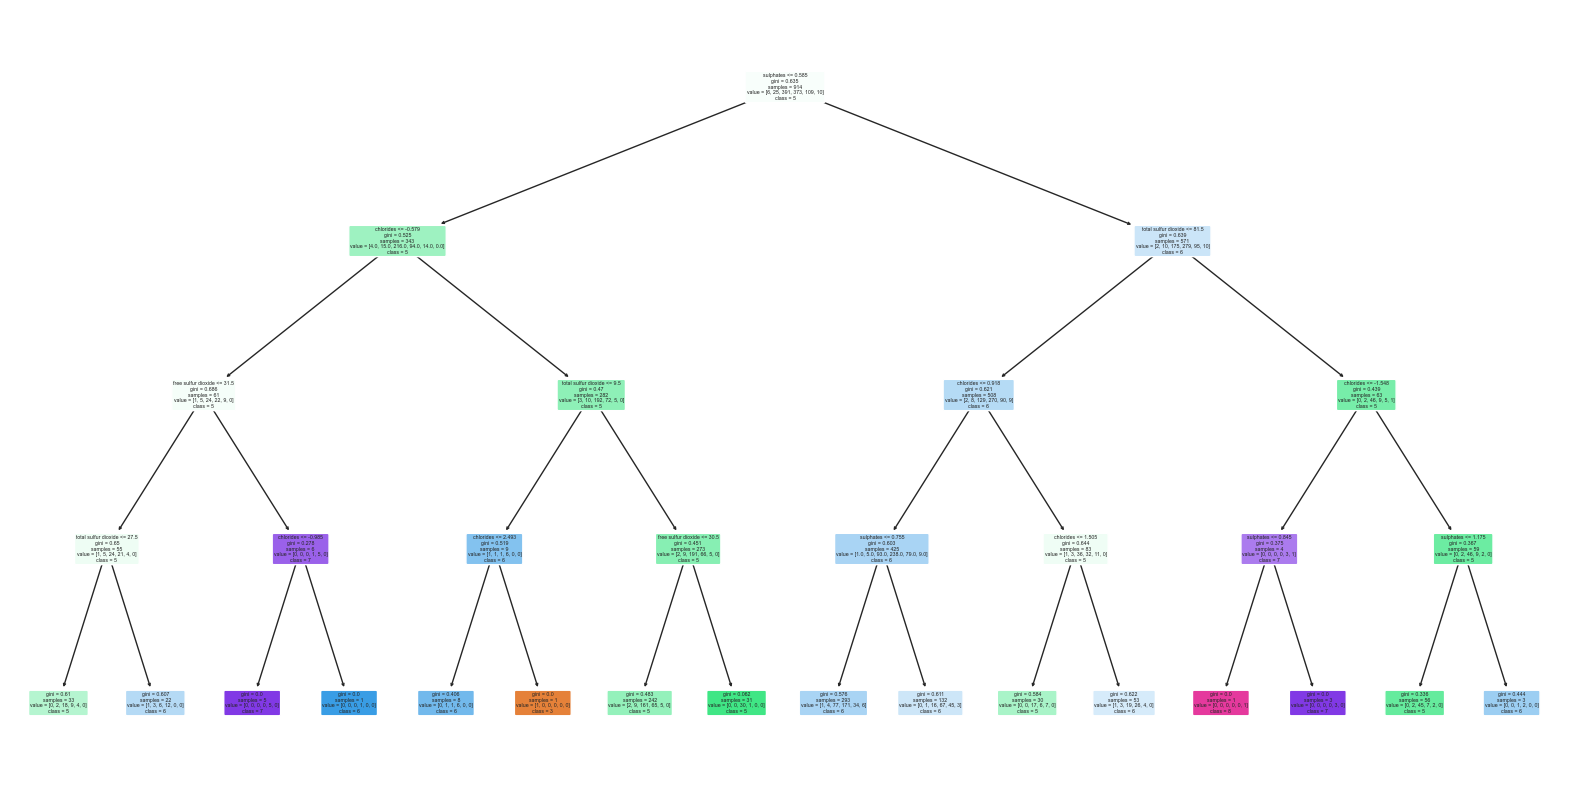

In [12]:
# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

model = DecisionTreeClassifier(max_depth=4)
model.fit(x_train, y_train)

f = plt.figure(figsize=(20,10))
plot_tree(model, filled=True, rounded=True, 
          feature_names=['chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates'], 
          class_names=['3','4','5','6','7','8'])

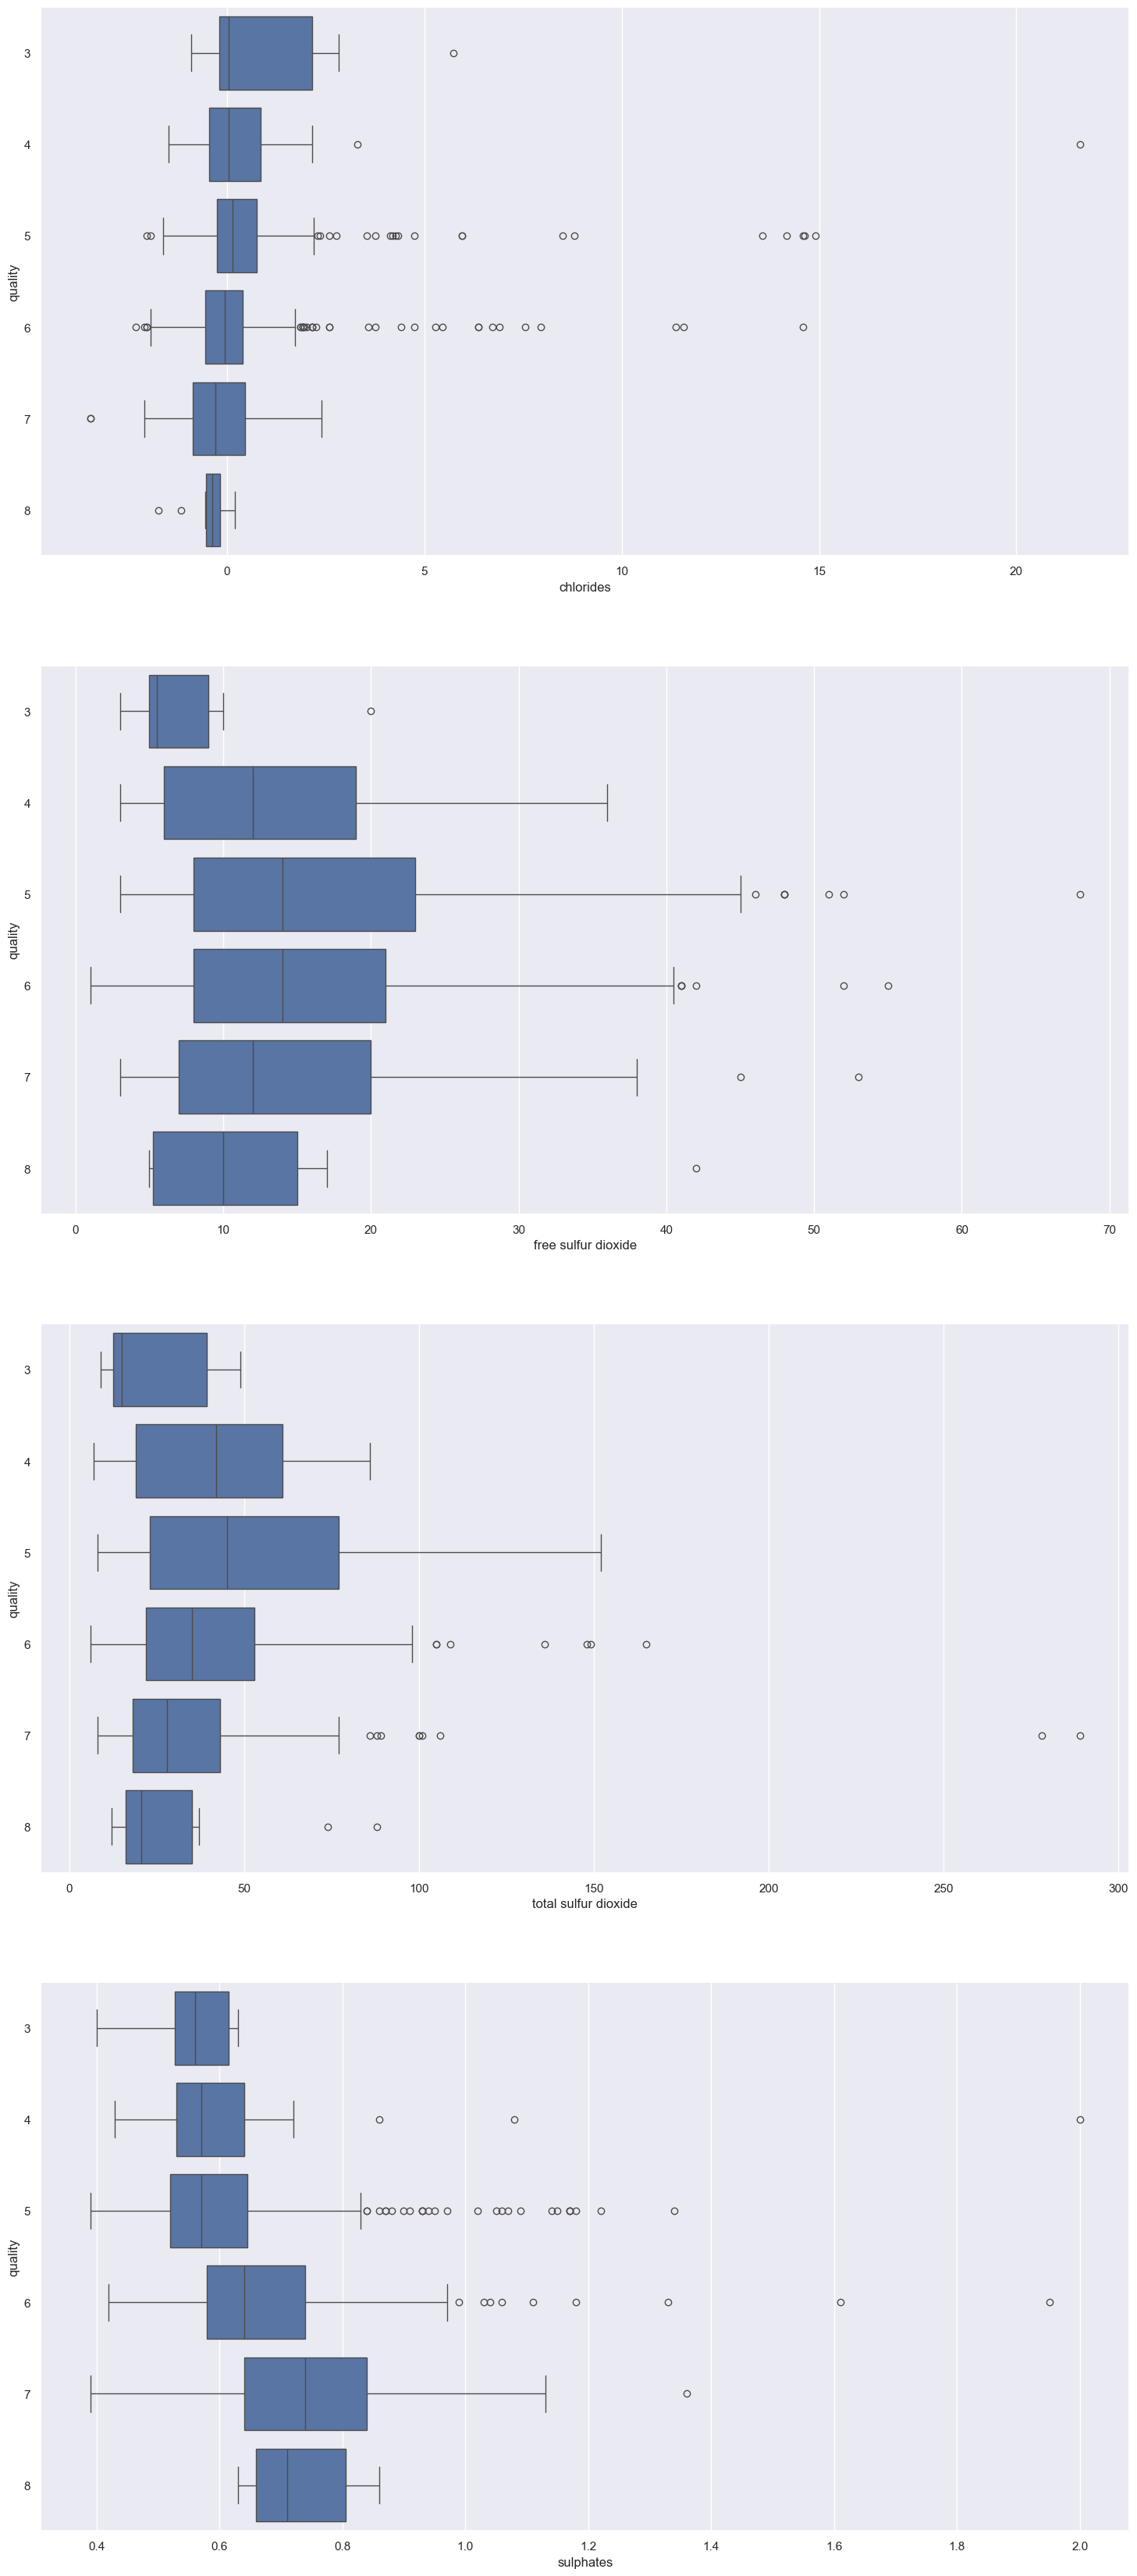

In [13]:
# Relationship between Response and the Predictors
trainDF = pd.concat([y_train, x_train], axis = 1).reindex(y_train.index)

f, axes = plt.subplots(4, 1, figsize=(18, 42))

count = 0
for var in x_train:
    sb.boxplot(x = var, y = "quality", data = trainDF, orient = "h", ax = axes[count])
    count += 1

In [14]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3) 
dectree.fit(x_train, y_train)                   

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(x_train)
y_test_pred = dectree.predict(x_test)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.600656455142232
Mean Squared Error: 0.5514223194748359

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5240174672489083
Mean Squared Error: 0.6812227074235808



<Axes: >

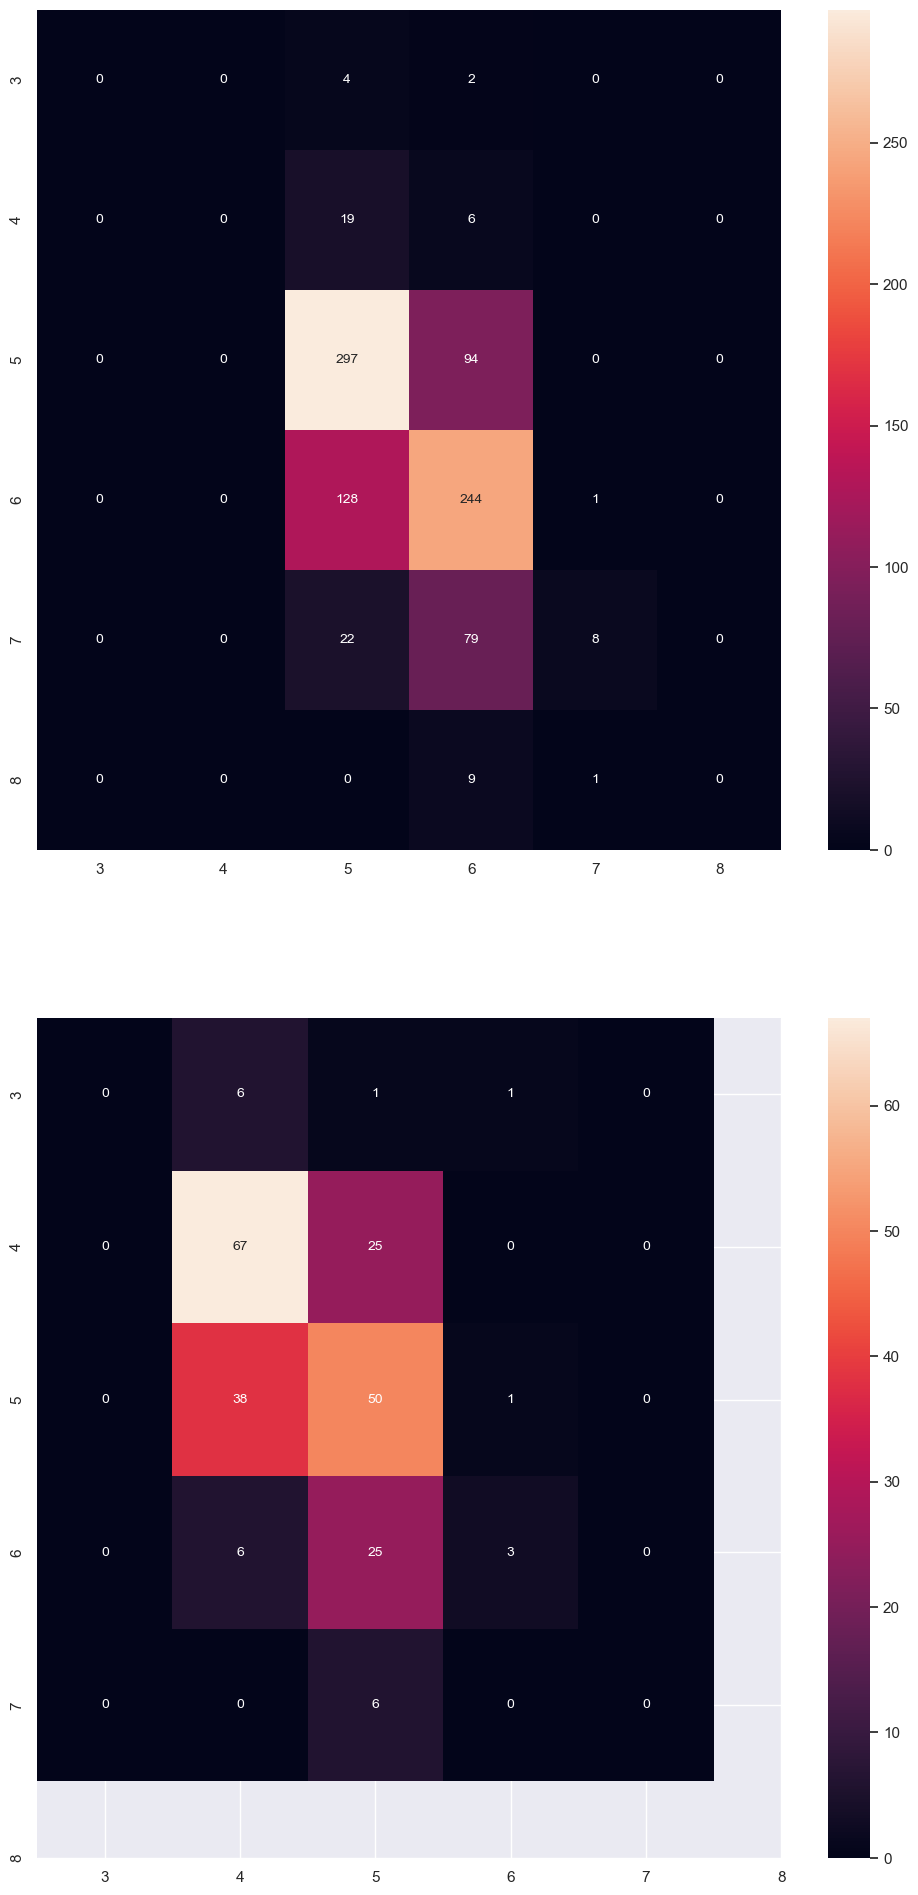

In [15]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(x_train, y_train))
mse_train = mean_squared_error(y_train, y_train_pred)
print(f'Mean Squared Error: {mse_train}')
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(x_test, y_test))
mse_train = mean_squared_error(y_test, y_test_pred)
print(f'Mean Squared Error: {mse_train}')
print()


# Plot the Confusion Matrix for Train and Test
labels = [3, 4, 5, 6, 7, 8]
f, axes = plt.subplots(2, 1, figsize=(12, 24))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 10}, xticklabels=labels, yticklabels=labels, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 10}, xticklabels=labels, yticklabels=labels, ax = axes[1])

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train.values.ravel())

y_rf_pred = rf_model.predict(x_test)
rf_mse = mean_squared_error(y_test, y_rf_pred)
print(f'Random Forest Mean Squared Error: {rf_mse}')

Random Forest Mean Squared Error: 0.6157205240174672
